# Produce example arterial pressure waveform

This is later used by `sidewinder.synthetic.synthetic_arterial_pressure_data()` to generate synthetic arterial pressure data.

Data are used under the terms of the [VitalDB Data Use Agreement](https://vitaldb.net/dataset/?query=overview&documentId=13qqajnNZzkN7NZ9aXnaQ-47NWy7kx-a6gbrcEsi-gak&sectionId=h.usmoena3l4rb). If you do not agree with this agreement, please close this file.

In [28]:
import os, sys
sys.path.append(os.pardir)  # Needed for sidewinder import before we install it

import matplotlib.pyplot as plt
import numpy as np

from scipy.signal import find_peaks, convolve
from sidewinder import synthetic
from sidewinder.waveforms import Waveforms
from sidewinder.features.waveform import find_troughs
from sidewinder.features import cycle

Load short segment of arterial pressure waveform:

In [29]:
data = synthetic.synthetic_arterial_pressure_data(
    systolic_pressure=120,
    diastolic_pressure=80,
    heart_rate=70,
    n_beats_target=7,
    hertz=100
)

In [30]:
data.head()

,time,pressure
0,0.00,80.036900
1,0.01,80.491320
2,0.02,82.081806
3,0.03,85.217117
4,0.04,89.627306


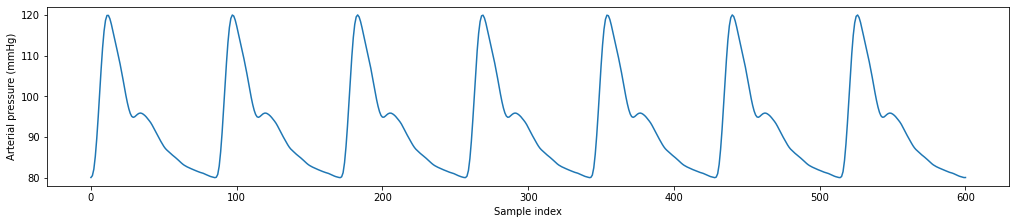

In [31]:
fig, ax = plt.subplots(figsize=(14, 3), constrained_layout=True)
ax.plot(data["pressure"])
ax.set(xlabel='Sample index', ylabel='Arterial pressure (mmHg)')
plt.show()

Use the example from the following paper to detect the dicrotic notch
https://journals.sagepub.com/doi/10.1177/0020294017729958#:~:text=Detection%20of%20dicrotic%20notch,smoothed%20using%20Savitzky%E2%80%93Golay%20filter.

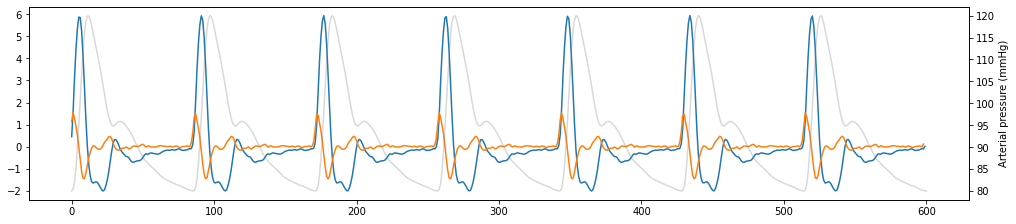

In [32]:
first_order_diff  = np.diff(data["pressure"])
second_order_diff = np.diff(data["pressure"], n=2)

fig, ax = plt.subplots(figsize=(14, 3), constrained_layout=True)
ax.plot(first_order_diff)
ax.plot(second_order_diff)
ax2 = ax.twinx()
ax2.plot(data["pressure"], "grey", alpha=0.3)
ax2.set(xlabel='Sample index', ylabel='Arterial pressure (mmHg)')
plt.show()

There is a locacl peak of both the first and second order differences around the dichrotic notch. lets have a quick play to make it more obvious

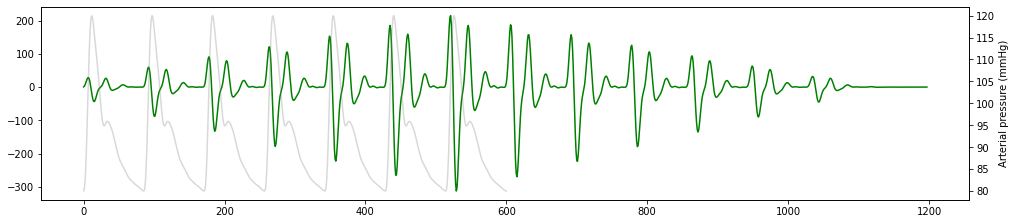

In [37]:
fig, ax = plt.subplots(figsize=(14, 3), constrained_layout=True)
ax.plot(convolve(first_order_diff, second_order_diff), "green")
ax2 = ax.twinx()
ax2.plot(data["pressure"], "grey", alpha=0.3)
ax2.set(xlabel='Sample index', ylabel='Arterial pressure (mmHg)')
plt.show()

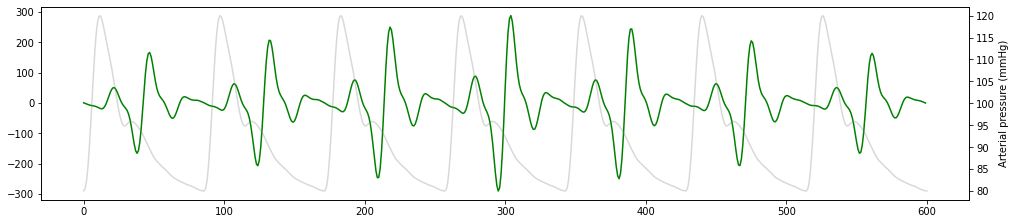

In [41]:
from scipy.signal import correlate

correlated = correlate(first_order_diff, second_order_diff, mode="same")
fig, ax = plt.subplots(figsize=(14, 3), constrained_layout=True)
ax.plot(correlated, "green")
ax2 = ax.twinx()
ax2.plot(data["pressure"], "grey", alpha=0.3)
ax2.set(xlabel='Sample index', ylabel='Arterial pressure (mmHg)')
plt.show()

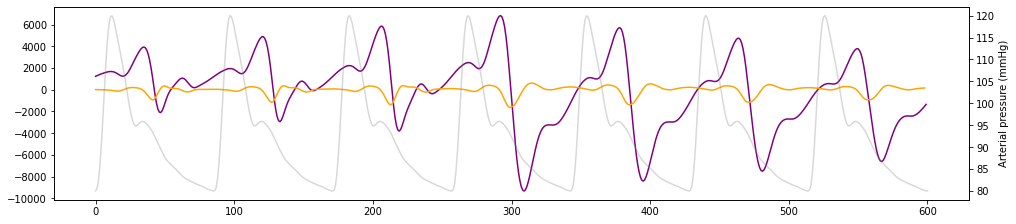

In [44]:
correlated1 = correlate(first_order_diff, data["pressure"], mode="same")
correlated2 = correlate(second_order_diff, data["pressure"], mode="same")

fig, ax = plt.subplots(figsize=(14, 3), constrained_layout=True)
ax.plot(correlated1, "purple")
ax.plot(correlated2, "orange")
ax2 = ax.twinx()
ax2.plot(data["pressure"], "grey", alpha=0.3)
ax2.set(xlabel='Sample index', ylabel='Arterial pressure (mmHg)')
plt.show()

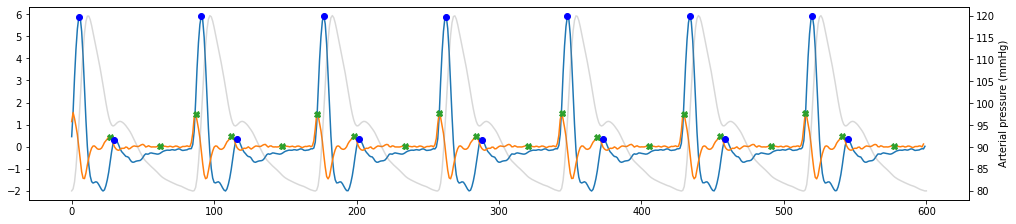

In [56]:


peaks, _ = find_peaks(second_order_diff, width=5)
peaks2, _ = find_peaks(first_order_diff, width=5)
fig, ax = plt.subplots(figsize=(14, 3), constrained_layout=True)
ax.plot(first_order_diff)
ax.plot(second_order_diff)
ax.plot(peaks, second_order_diff[peaks], "X")
ax.plot(peaks2, first_order_diff[peaks2], "bo")
ax2 = ax.twinx()
ax2.plot(data["pressure"], "grey", alpha=0.3)
ax2.set(xlabel='Sample index', ylabel='Arterial pressure (mmHg)')
plt.show()